# Plotter


| **Action**          | **Where in Code**   | **Description**                                                        |
| ------------------- | ------------------- | ---------------------------------------------------------------------- |
| Make plotter        | `__init__()`        | Starts with an empty list called `shapes` to store all shapes.         |
| Add shapes          | `add_shape()`       | Adds a `Circle` or `Rectangle` object into the list.                   |
| Start plotting      | `plot_all()`        | Creates a figure and axes for drawing using `matplotlib`.              |
| Loop through shapes | `for` loop          | Goes through every shape stored in the list.                           |
| Draw old position   | Inside loop         | Draws the first position of each shape using **dashed black lines**.   |
| Move the shape      | `s.translate(2, 1)` | Moves each shape to a new location (x + 2, y + 1).                     |
| Draw new position   | Inside loop         | Draws each shape again at its new position with **solid color lines**. |
| Label coordinates   | `ax.text()`         | Shows each shape’s `(x, y)` coordinates beside it.                     |
| Adjust view         | End of `plot_all()` | Fits the plot to include all shapes, adds title and grid.              |
| Show plot           | `plt.show()`        | Displays the final figure with both old and new positions.             |

- Plotter (draws both circle and rectangle)

- Since circle.py and rectangle.py already inherit from Geometry, no need 
to repeat x, y. Just loop through the unique attributes per shape.

- Draws both shapes on the same axes using matplotlib.patches

- The translate() built into Geometry parent class, reuse it and just make the movement visible.

In [ ]:
# Plot circles and rectangles and show their movement (translation)

import matplotlib.pyplot as plt
import matplotlib.patches as patches


class Plotter:
    """
    Plotter class for drawing 2D shapes.
    Used to display circles and rectangles
    and visualize how they move (translation).
    """
    def __init__(self):
        # empty list that stores all shape objects
        self.shapes = []

    def add_shape(self, shape, x_move = 0, y_move = 0):
        """
        Adds a new shape to the list.
        Each shape can be a Circle or a Rectangle.
        add_shape() now takes three parameters:
        stores them as a tuple inside the list
        default = 0
        bundle three args into a single tuple
        """
        self.shapes.append((shape, x_move, y_move))


    def plot_all(self):
        """
        Draw all shapes on the same plot.
        Show both the original position (dotted line)
        and the new translated position (solid line).
        """
        fig, ax = plt.subplots() # all in 1 grid
        for n, (s, new_x, new_y) in enumerate(self.shapes, start = 1):
            name = s.__class__.__name__
            """ 
            for loop to detect what shape is being drawn
            unpacks each tuple so s is shape, dx = x-move, and dy = y-move.
            """
            print(f"Moving {s.__class__.__name__} {n} by {new_x}, {new_y}\n")

# --------------------------------
#     Original coordinates
# --------------------------------
            if name == "Circle":
                # draw the first circle position (before moving)
                old_patch = patches.Circle((s.x, s.y), s.radius, edgecolor = "black", fill = False, linestyle = "--")
                ax.add_patch(old_patch)
                ax.text(s.x, s.y, f"({s.x}, {s.y})", fontsize = 10, color = "black")

            elif name == "Rectangle":
                # draw the rectangle again after movement
                old_patch = patches.Rectangle((s.x, s.y), s.width, s.height, edgecolor = "red", fill = False, linestyle = "--")
                ax.add_patch(old_patch)
                ax.text(s.x, s.y, f"({s.x}, {s.y})", fontsize = 10, color = "red")


# --------------------------------
#         Translate Method
# --------------------------------
            # print new coordinates in terminal for reference
            s.translate(new_x, new_y)  # move by incrementation

# --------------------------------
#       New coordinates
# --------------------------------
            if name == "Circle":
                new_patch = patches.Circle((s.x, s.y), s.radius, edgecolor = "darkblue", fill = False, linewidth = 2)
                ax.add_patch(new_patch)
                ax.text(s.x, s.y, f"({s.x}, {s.y})", fontsize = 12, color="darkblue")

            elif name == "Rectangle":
                new_patch = patches.Rectangle((s.x, s.y), s.width, s.height, edgecolor = "green", fill = False, linewidth = 2)
                ax.add_patch(new_patch)
                ax.text(s.x, s.y, f"({s.x}, {s.y})", fontsize = 12, color = "darkgreen")

            # print result in terminal
            print(f"{name}, {n} moved to new position ({s.x}, {s.y})\n")

# --------------------------------
#     Plot appearance
# --------------------------------
        # help with LLM to fix lim problem
        ax.relim()
        ax.autoscale_view()
        ax.margins(0.2)   # adds 20% padding around the visible area


        # keep both axes scaled equally for better shape proportions
        ax.set_aspect("equal")

        # turn on grid lines for easier visualization
        ax.grid(True)
        ax.set_title("Circle and Rectangle Plotter")
        plt.show()


Moving Circle 1 by 1, 3

Circle 1 moved to new position (6, 7)

Moving Circle 2 by -4, -2

Circle 2 moved to new position (0, 1)

Moving Rectangle 3 by 1, 1

Move x coordinates by 1
y coordinates by 1
New rectangle coordinates:(4,-1)
Rectangle 3 moved to new position (4, -1)



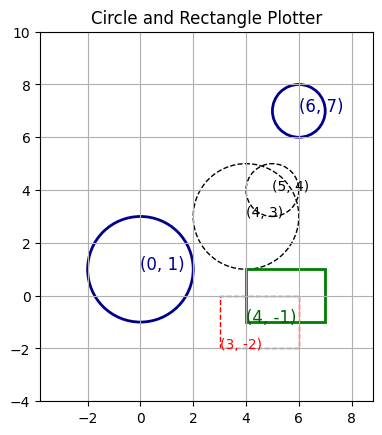

In [17]:
from circle import Circle
from rectangle import Rectangle

# create shapes
c1 = Circle(5, 4, 1)
c2 = Circle(4, 3, 2)
r1 = Rectangle(3, -2, 3, 2)

# create plotter and add shapes with unique translations (movements)
plotter = Plotter()
plotter.add_shape(c1, 1, 3)    # move Circle 1 by (1, 3)
plotter.add_shape(c2, -4, -2)  # move Circle 2 by (-1, -2)
plotter.add_shape(r1, 1, 1)    # move r1 by (1, 1)

# plot all shapes
plotter.plot_all()
